In [33]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Employee.csv')

# Print the column names to check for any discrepancies
print(data.columns)


Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')


In [35]:
import pandas as pd

data = pd.read_csv('Employee.csv')

print(f"Unique values in 'Age' column: {data['Age'].unique()}")
print(f"Length of unique values in 'Age' column: {len(data['Age'].unique())}")

print("Statistical Summary of 'Age':")
print(data['Age'].describe())

data.rename(columns={'Age': 'Age of employee'}, inplace=True)

print(data.head())

Unique values in 'Age' column: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Length of unique values in 'Age' column: 30
Statistical Summary of 'Age':
count    130.000000
mean      30.484615
std       11.096640
min        0.000000
25%       22.000000
50%       32.500000
75%       37.750000
max       54.000000
Name: Age, dtype: float64
   Company  Age of employee  Salary     Place Country  Gender
0      TCS             20.0     NaN   Chennai   India       0
1  Infosys             30.0     NaN    Mumbai   India       0
2      TCS             35.0  2300.0  Calcutta   India       0
3  Infosys             40.0  3000.0     Delhi   India       0
4      TCS             23.0  4000.0    Mumbai   India       0


In [45]:
print(data.isnull().sum())

data['Age of employee'] = data['Age of employee'].replace(0, pd.NA)

data['Age of employee'].fillna(data['Age of employee'].mean(), inplace=True)
data['Salary'].fillna(data['Salary'].median(), inplace=True)
data['Age of employee'].fillna(data['Age of employee'].mode(), inplace=True)

data.drop_duplicates(inplace=True)

print(data.head())

Company             8
Age of employee    18
Salary             24
Place              14
Country             0
Gender              0
dtype: int64
   Company  Age of employee  Salary     Place Country  Gender
0      TCS             20.0  5000.0   Chennai   India       0
1  Infosys             30.0  5000.0    Mumbai   India       0
2      TCS             35.0  2300.0  Calcutta   India       0
3  Infosys             40.0  3000.0     Delhi   India       0
4      TCS             23.0  4000.0    Mumbai   India       0


C:\Users\shahe\AppData\Local\Temp\ipykernel_9132\4000645106.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age of employee'].fillna(data['Age of employee'].mean(), inplace=True)
C:\Users\shahe\AppData\Local\Temp\ipykernel_9132\4000645106.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Age o

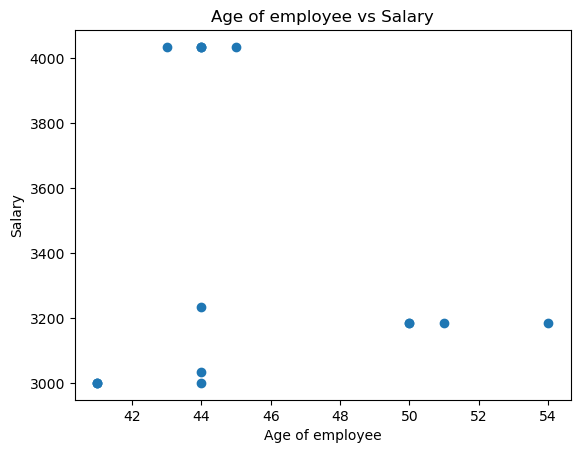

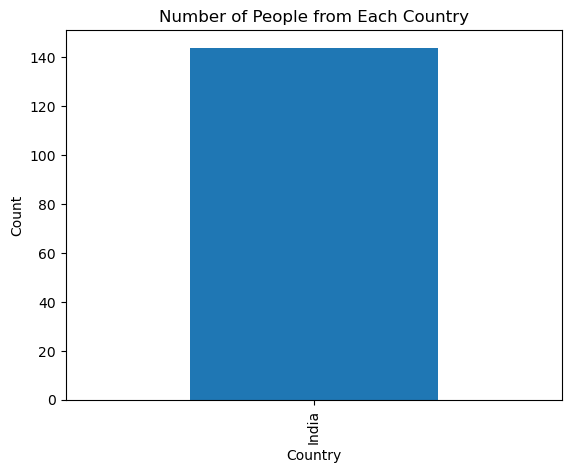

In [53]:
import matplotlib.pyplot as plt

filtered_data = data[(data['Age of employee'] > 40) & (data['Salary'] < 5000)]

plt.scatter(filtered_data['Age of employee'], filtered_data['Salary'])
plt.title('Age of employee vs Salary')
plt.xlabel('Age of employee')
plt.ylabel('Salary')
plt.show()

location_counts = data['Country'].value_counts()

location_counts.plot(kind='bar')
plt.title('Number of People from Each Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [55]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Country_encoded'] = label_encoder.fit_transform(data['Country'])

data = pd.get_dummies(data, columns=['Country'], drop_first=True)

print(data.head())

   Company  Age of employee  Salary     Place  Gender  Country_encoded
0      TCS             20.0  5000.0   Chennai       0                0
1  Infosys             30.0  5000.0    Mumbai       0                0
2      TCS             35.0  2300.0  Calcutta       0                0
3  Infosys             40.0  3000.0     Delhi       0                0
4      TCS             23.0  4000.0    Mumbai       0                0


In [57]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

features = ['Age of employee', 'Salary']  

scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

minmax_scaler = MinMaxScaler()
data[features] = minmax_scaler.fit_transform(data[features])

print(data.head())

   Company  Age of employee    Salary     Place  Gender  Country_encoded
0      TCS         0.081081  0.445089   Chennai       0                0
1  Infosys         0.351351  0.445089    Mumbai       0                0
2      TCS         0.486486  0.137817  Calcutta       0                0
3  Infosys         0.621622  0.217480     Delhi       0                0
4      TCS         0.162162  0.331285    Mumbai       0                0
